## Lesson 4. Measures of spread

**Introduction**. In this lesson we'll explore two more summary statistics, the *interquartile range* and the *standard deviation*. These help us understand how the data are spread out about their center. We'll compute them both using the Python statistics module, and we'll add visual representations of them to our histograms.

**Goal**. Choose a measure of spread appropriate for the data. Represent the spread of the data set graphically.

In this lesson we'll use the same histograms as in lesson 3. Again, we'll place all our code for the first histogram in the cell labeled  
`###CODE FOR FIRST HISTOGRAM###`\.  
Code for the second histogram will go in the cell labeled  
`###CODE FOR SECOND HISTOGRAM###`.

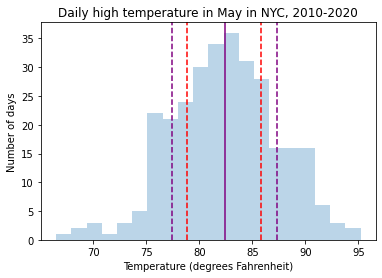

In [4]:
###CODE FOR FIRST HISTOGRAM###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

a = np.random.normal(loc = 82, scale = 5, size = 300)
fig, axs = plt.subplots()
axs.hist(a, bins = 20, alpha = 0.3) #alpha = 0.3 makes the hist more transparent to emphasize vertical lines.

axs.set_xlabel("Temperature (degrees Fahrenheit)")
axs.set_ylabel("Number of days")
axs.set_title(label = "Daily high temperature in May in NYC, 2010-2020")

#mda = st.median(a)
#axs.axvline(st.median(a), color = 'red')
abar = st.mean(a)
axs.axvline(st.mean(a), color = 'purple')

#Sample response:
axs.axvline(st.mean(a) + st.stdev(a), color = 'purple', linestyle = '--')
axs.axvline(st.mean(a) - st.stdev(a), color = 'purple', linestyle = '--')
quartiles = st.quantiles(a, n = 4)
axs.axvline(quartiles[0], color = 'red', linestyle = '--')
axs.axvline(quartiles[2], color = 'red', linestyle = '--')

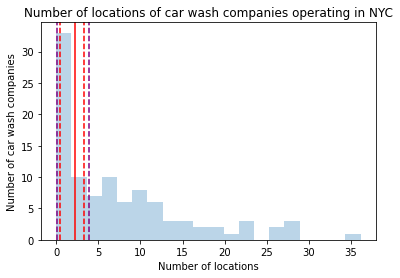

In [5]:
###CODE FOR SECOND HISTOGRAM###

b = np.random.normal(loc = 2, scale = 2, size = 100)
fig, axs = plt.subplots()
axs.hist(b**2, bins = 20, alpha = 0.3)

axs.set_xlabel("Number of locations")
axs.set_ylabel("Number of car wash companies")
axs.set_title(label = "Number of locations of car wash companies operating in NYC")

mdb = st.median(b)
axs.axvline(st.median(b), color = 'red')

#sample response:
quartiles = st.quantiles(b, n = 4)
axs.axvline(quartiles[0], color = 'red', linestyle = '--')
axs.axvline(quartiles[2], color = 'red', linestyle = '--')
axs.axvline(st.mean(b) + st.stdev(b), color = 'purple', linestyle = '--')
axs.axvline(st.mean(b) - st.stdev(b), color = 'purple', linestyle = '--')

### Standard deviation

On average, about how far away from the mean are the members of our data set? If most of our data is very close to the mean, then we can expect to be fairly accurate when we use the mean to predict future values. Another way to say this is that we can be *confident* that a randomly selected member of the dataset will be within a small distance of the mean.  

If the data is very spread out, we can't be as sure of where randomly selected data points will lie. While our best prediction is still the mean, that prediction won't be as accurate when the data is very spread out. We are less confident that randomly selected data points will be close to the mean.  

The *standard deviation* is one measure of spread that helps us gauge how confidently we can make predictions about our data set. You can think of the sample standard deviation, *s*, as the average distance between the mean and a random point in the data set.  

Just like the mean, we typically use standard deviation as a measure of spread for data that is symmetric.  

To compute the standard deviation for a data set, use `stdev()` from the statistics module.

1. Plot vertical lines at $\bar{a} + s$ and $\bar{a} - s$ over the first histogram. In the call to `axvline()`, use the keyword argument `linestyle = "--"` to differentiate these dashed lines from the solid line at $\bar{a}$.

### Interquartile range

Starting from the median, how far out in both directions must we extend an interval to encompass half our data set? The answer to this question is the *interquartile range* (IQR). If half our data lies within a narrow interval of the median, then our data is not very spread out, and we can have greater confidence in our predictions, as described in the section on standard deviation.  

The IQR is calculated in two steps. First, we locate the *quartiles* of our data set. Just as the median divides a data set into an upper and lower half, the quartiles divide the data set into four equal-size parts. You can think of the first quartile, Q1, as the median of the lower half of the data. The third quartile, Q3, is the median of the upper half of the data.

Second, we compute the difference: IQR = Q3 - Q1.  

Just like the median, we typically use IQR with data that is skewed.  

To compute the quartiles for a data set, we need to proceed in steps.  
1. Use the `quantiles()` function in the statistics module to populate a list containing the three quartiles.  
2. Subtract the element at index 0, which is Q1, from the element at index 2, which is Q3. The difference is the IQR.  

Use the example below as a model.

In [7]:
x = [2, 3, 5, 7.2, 11, 12, 12.1, 13, 14, 14, 14.5, 21]
x_quartiles = st.quantiles(x, n = 4)
xiqr = x_quartiles[2] - x_quartiles[0]
print("IQR = " + str(xiqr))

IQR = 8.45


2. Plot vertical dashed lines at Q1 and Q3 over the second histogram.

3. For each histogram, plot vertical lines for the *other* measure of spread. Use a different color or linestyle to differentiate these lines.

### Summary

In addition to measures of center, summary statistics regarding the spread of a data set help to give a clearer picture.  
The standard deviation can be thought of as the average distance between a random member of a data set and the mean of the data set. It's typically used to measure spread of symmetric data sets.  
The interquartile range is the width of the region around the median that contains half the members of the data set. It's typically used to measure spread of skewed data sets.

### Discussion questions

4. How do the different intervals that measure spread compare in both histograms?

*Sample response*: In both histograms, the region within 1 standard deviation of the mean is wider than the interquartile range. Even though standard deviation and interquartile range are both measures of variability, they measure different things. So we shouldn't expect them to exactly coincide, the way that the mean and median sometimes do for symmetric data sets.

5. Does it matter which measure of spread we choose for a data set? Why or why not?

*Sample response*: When data are skewed, this choice might matter more. The most important thing is to consistently use the same measure of variability when comparing spread across different data sets.

6. The cell below contains code to compute `x_myst`, a mystery interval over the data in the code cell above.

In [10]:
x = [2, 3, 5, 7.2, 11, 12, 12.1, 13, 14, 14, 14.5, 21]
x_quantiles = st.quantiles(x, n = 10)
x_myst = x_quantiles[2] - x_quantiles[0]

#Sample response:
print(xiqr - x_myst)

3.7699999999999996


State a prediction about how `x_myst` compares to `xiqr`. Then assess your prediction by adding code to the cell above.

*Sample response*: `x_myst` is the width from the first *decile* to the third *decile*. This will be smaller than the interquartile range.